In [1]:
import pandas as pd
import re
import seaborn as sns
import cloudpickle
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
list_=[]
df = pd.read_csv('doctorslounge_data.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('ehealthforum_data.csv', index_col=None, header=0)
list_.append(df)
df = pd.read_csv('scarleteen_data.csv', index_col=None, header=0)
list_.append(df)

In [5]:
df=pd.concat(list_,ignore_index=True)
df=df.drop(df.columns[0],1)

In [6]:
diseases = pd.read_csv("disease_list.csv",index_col=0, header=0)
diseases = diseases['name'].str.strip().str.replace(' +',' ').str.lower()
d_list = diseases.loc[:373].tolist()

diseases = pd.read_csv("disease_list_cdc.csv",index_col=None, header=0)
diseases = diseases['name'].str.strip().str.replace(' +',' ').str.lower()
d_list=d_list+diseases.tolist()
d_list.remove('hiv/aids')

#d_list=d_list+[words for segments in d_list for words in segments.split()]
pd_dis=pd.DataFrame(d_list).drop_duplicates(0)
d_list = pd_dis[0].tolist()
pd_dis['onlinediag_count']=0
pd_dis['forummention_count']=0
pd_dis['us_freq']=0

In [7]:
#txt = df.loc[df['response_type']=='doctor','response'].str.lower().tolist()
#df['response_time']=pd.to_datetime(df['response_time'].str.replace('replied ',''))

In [8]:
df.shape

(12126, 7)

In [9]:
ti=0
for post in df['post'].unique():
    if(ti%100==0):
        print ti
    ti=ti+1
    subdf = df['post']==post
    txt = df.loc[subdf & (df['response_type']=='doctor'),'response']
    txt2 = df.loc[subdf & (df['response_type']=='asker'),'response']
    if(not txt.empty):
        ask_time = df.loc[subdf & (df['response_type']=='asker'),'response_time']
        res_time = df.loc[subdf & (df['response_type']=='doctor'),'response_time']
        diag = pd_dis.loc[[re.search(r'\b'+word+r'\b', txt.str.lower().tolist()[0])>0 for word in d_list],0].tolist()
        if(not txt2.empty):
            sdiag= pd_dis.loc[[re.search(r'\b'+word+r'\b', txt2.str.lower().tolist()[0])>0 for word in d_list],0].tolist()
        else:
            sdiag=[]
        df.loc[subdf,'diagnosis_count'] = len(diag)
        df.loc[subdf,'selfdiagnosis_count'] = len(sdiag)
        df.loc[subdf,'label']=';'.join(diag)
        for w in diag:
            pd_dis.loc[pd_dis[0]==w,'onlinediag_count']=pd_dis.loc[pd_dis[0]==w,'onlinediag_count']+1
            if 'diag_'+w in df.columns:
                df.loc[subdf,'diag_'+w]=df.loc[subdf,'diag_'+w]+1
            else:
                df['diag_'+w]=0
                df.loc[subdf,'diag_'+w]=1
        for w in sdiag:
            pd_dis.loc[pd_dis[0]==w,'forummention_count']=pd_dis.loc[pd_dis[0]==w,'forummention_count']+1
            if 'namedis_'+w in df.columns:
                df.loc[subdf,'namedis_'+w]=df.loc[subdf,'namedis_'+w]+1
            else:
                df['namedis_'+w]=0
                df.loc[subdf,'namedis_'+w]=1
        df.loc[subdf & (df['response_type']=='asker'),'lag']=res_time.tolist()[0]
    else:
        df=df.loc[[not i for i in subdf.tolist()],:]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [10]:
df = df.loc[df['response_type']=='asker',:]
df.to_csv("compiled_data_toclassify.csv")

with open("condition_statistics.pkl", 'wb') as handle:
    cloudpickle.dump(pd_dis, handle)

In [2]:
df = pd.read_csv("compiled_data_toclassify.csv")

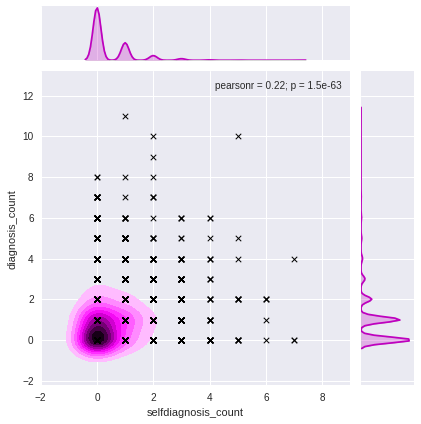

In [9]:
g = sns.jointplot(x='selfdiagnosis_count', y='diagnosis_count', data=df, kind="kde", color="m", bw=0.5)
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker="x")
g.ax_joint.collections[0].set_alpha(0)

In [ ]:
sns.distplot(df['lag'].apply(lambda x: float(x.days)))